In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

2024-06-10 05:01:47.406500: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-10 05:01:48.141058: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Función para añadir más de una característica
def add_feature1(X, feature_to_add):
    """
    Returns sparse feature matrix with added feature.
    feature_to_add can also be a list of features.
    """
    from scipy.sparse import csr_matrix, hstack
    # Se concatena la secuncia de caracteres del conjunto de train con un matriz dispersa
    return hstack([X, csr_matrix(feature_to_add)], 'csr')

# Función para añadir una característica a la vez
def add_feature2(X, feature_to_add):
    """
    Returns sparse feature matrix with added feature.
    feature_to_add can also be a list of features.
    """
    from scipy.sparse import csr_matrix, hstack
    # Se concatena la secuncia de caracteres del conjunto de train con un matriz dispersa
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [3]:
print('*'*30)
print('Comienza procesamiento de datos')
# Dataset con las características estilométricas
train_stylometry=pd.read_csv('exp_train/stylometry_train_S2.csv')
test_stylometry=pd.read_csv('exp_test/stylometry_test_S2.csv')
#train_stylometry=pd.read_csv('Train/stylometry_train_S2.csv')
#test_stylometry=pd.read_csv('Test/stylometry_test_S2.csv')
train_stylometry = train_stylometry.values 
test_stylometry=test_stylometry.values
print('Stylometry listo!')
    
#Dataset LLM Bert
train_bert=pd.read_csv('exp_train/train_subtask2bert-base-multilingual-cased-finetuned-autext24-subtask2.csv',header=None)
test_bert=pd.read_csv('exp_test/test_subtask2bert-base-multilingual-cased-finetuned-autext24-subtask2.csv',header=None)
#train_bert=pd.read_csv('Train/train_subtask2bert-base-multilingual-cased-finetuned-autext24-subtask2.csv',header=None)
#test_bert=pd.read_csv('Test/test_subtask2bert-base-multilingual-cased-finetuned-autext24-subtask2.csv',header=None)
train_bert=train_bert.values
test_bert=test_bert.values
print('LLM Bert listo!')

# Dataset LLM Multilingual_e5 
train_e5=pd.read_csv('exp_train/train_subtask2multilingual-e5-large-finetuned-autext24-subtask2.csv', header=None)
test_e5=pd.read_csv('exp_test/test_subtask2multilingual-e5-large-finetuned-autext24-subtask2.csv',header=None)
#train_e5=pd.read_csv('Train/train_subtask2multilingual-e5-large-finetuned-autext24-subtask2.csv', header=None)
#test_e5=pd.read_csv('Test/test_subtask2multilingual-e5-large-finetuned-autext24-subtask2.csv',header=None)
train_e5=train_e5.values
test_e5=test_e5.values
print('LLM E5 listo!')
        
#Dataset roberta 
train_roberta=pd.read_csv('exp_train/train_subtask2xlm-roberta-base-finetuned-autext24-subtask2.csv',header=None)
test_roberta=pd.read_csv('exp_test/test_subtask2xlm-roberta-base-finetuned-autext24-subtask2.csv',header=None)
#train_roberta=pd.read_csv('Train/train_subtask2xlm-roberta-base-finetuned-autext24-subtask2.csv',header=None)
#test_roberta=pd.read_csv('Test/test_subtask2xlm-roberta-base-finetuned-autext24-subtask2.csv',header=None)
train_roberta=train_roberta.values
test_roberta=test_roberta.values
print('LLM Roberta listo!')

******************************
Comienza procesamiento de datos
Stylometry listo!
LLM Bert listo!
LLM E5 listo!
LLM Roberta listo!


In [4]:
# Dataset original
train_data = pd.read_csv('exp_train/train_S2.csv')
test_data = pd.read_csv('exp_test/test_S2.csv')
#train_data = pd.read_json('Train/subtask_2.jsonl',lines=True)
#test_data = pd.read_json('Test/test_original.jsonl',lines=True)

etiquetas = ['A', 'B', 'C', 'D', 'E', 'F']
for i, clase in enumerate(etiquetas):
    train_data['label'] = np.where(train_data['label'] == clase, i, train_data['label'])

for i, clase in enumerate(etiquetas):
    test_data['label'] = np.where(test_data['label'] == clase, i, test_data['label'])

X_train_data=train_data['text']
y_train_data=train_data['label']
X_test_data=test_data['text']
y_test_data=test_data['label']
y_train_data = y_train_data.astype(int)
y_test_data = y_test_data.astype(int)
    
print(train_data.shape)
print(test_data.shape)
print('Datos originales, listo!')

(41127, 3)
(17627, 3)
Datos originales, listo!


In [5]:
# Datos de entrenamiento
X_train_cv=add_feature1(train_stylometry,train_bert)
X_train_cv=add_feature1(X_train_cv,train_e5)
X_train_cv=add_feature1(X_train_cv,train_roberta)
# Calculamos más características adicionales 
num_digits= X_train_data.str.count('\d')
num_stops = X_train_data.str.count('\s')    
# Y las agregamos a nuestros datos 
X_train_cv = add_feature2(X_train_cv, num_digits)
X_train_cv = add_feature2(X_train_cv, num_stops)
print('Datos de entrenamiento listos!')

# Datos de prueba 
X_test_cv=add_feature1(test_stylometry,test_bert)
X_test_cv=add_feature1(X_test_cv,test_e5)
X_test_cv=add_feature1(X_test_cv,test_roberta)
# Calculamos más características adicionales
num_digits_test= X_test_data.str.count('\d')
num_stops_test = X_test_data.str.count('\s')
# Y las agregamos a nuestros datos
X_test_cv = add_feature2(X_test_cv, num_digits_test)
X_test_cv = add_feature2(X_test_cv, num_stops_test)
print('Datos de prueba listos!')
print('Termina procesamiento de datos')
print('*'*30)

Datos de entrenamiento listos!
Datos de prueba listos!
Termina procesamiento de datos
******************************


In [8]:
import tensorflow as tf
from keras.optimizers import Adam

# Modelo secuencial
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_cv.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(6, activation='softmax')
])

# Optimizador
learning_rate = 0.0001
optimizer = Adam(learning_rate=learning_rate)

# Compilamos el modelo
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       329,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 338,374 (1.29 MB)

 Trainable params: 338,374 (1.29 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Comenzamos con el entrenamiento. Dejamos otro 20% para el conjunto de validación.
history = model.fit(X_train_cv, y_train_data, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 26s 100ms/step - accuracy: 0.7498 - loss: 1.5103 - val_accuracy: 0.9938 - val_loss: 0.0262
Epoch 2/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 25s 97ms/step - accuracy: 0.9802 - loss: 0.0809 - val_accuracy: 0.9948 - val_loss: 0.0228
Epoch 3/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 25s 98ms/step - accuracy: 0.9888 - loss: 0.0465 - val_accuracy: 0.9957 - val_loss: 0.0196
Epoch 4/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 25s 98ms/step - accuracy: 0.9918 - loss: 0.0341 - val_accuracy: 0.9951 - val_loss: 0.0220
Epoch 5/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 26s 99ms/step - accuracy: 0.9932 - loss: 0.0303 - val_accuracy: 0.9957 - val_loss: 0.0200
Epoch 6/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 25s 98ms/step - accuracy: 0.9939 - loss: 0.0263 - val_accuracy: 0.9955 - val_loss: 0.0192
Epoch 7/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 26s 99ms/step - accuracy: 0.9946 - loss: 0.0227 - val_accuracy: 0.9957 - val_loss: 0.0194
Epoch 8/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 26s 101ms/step - accuracy: 0.9948 - loss: 0.0250 

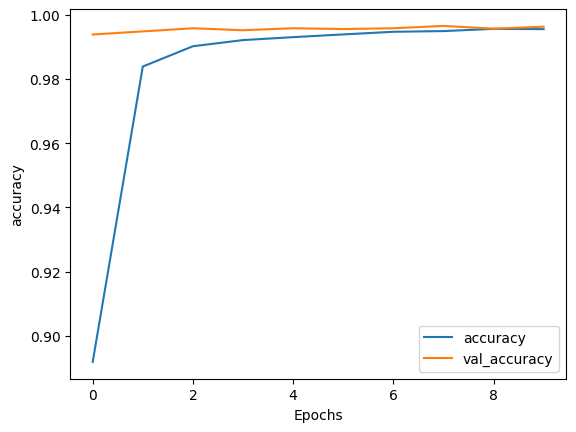

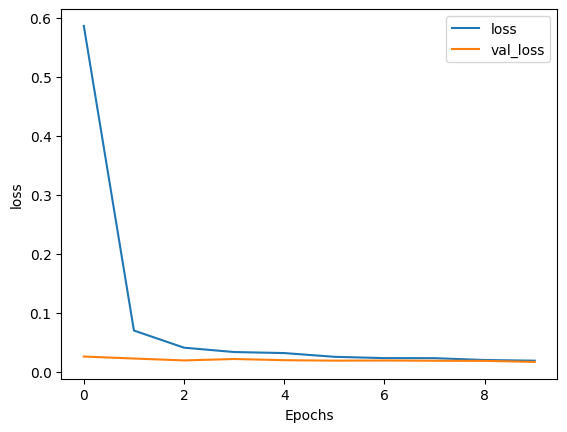

In [10]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [11]:
# Evaluación del modelo
test_loss, test_accuracy = model.evaluate(X_test_cv, y_test_data)

print("Accuracy en los datos de prueba:", test_accuracy)

551/551 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8840 - loss: 0.8606
Accuracy en los datos de prueba: 0.8851761221885681


In [12]:
y_pred = model.predict(X_test_cv)

551/551 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step


In [14]:
from sklearn.metrics import f1_score
y_pred_labels = np.argmax(y_pred, axis=1)
f1 = f1_score(y_test_data, y_pred_labels, average='weighted') 

In [15]:
f1

0.8849116277230369